In [44]:
import numpy as np #PAra algebra lineal
import pandas as pd #Procesamiento de datos
import matplotlib.pyplot as plt #Graficar
import seaborn as sns #Visualizar datos
from collections import Counter

In [45]:
df = pd.read_csv("violencia_interfamiliar.csv")

In [46]:
df.head()

,fecha_de_apertura,dia_de_apertura,fecha_ocurrencia_hechos,dia_ocurrencia,hora_militar_ocurrencia_hechos,conforman_unidad_domestica,fisica,verbal,economica,psicologica,...,parentesco_frente_a_la_victima,no_de_hijos_agresor,edad_agresor,estado_civil_agresor,escolaridad_agresor,ocupacion_agresor,corregimiento_agresor,comuna_agresor,barrio,tipo_vivienda
0,2022-06-01T00:00:00.000,jueves,29/12/2021,miércoles,9:35 a.m.,si,si,si,no,si,...,ex-conyuge,1.0,23.0,soltero(a),bachiller completo,empleado,juanchito,comuna10,no,familiar
1,2022-07-01T00:00:00.000,viernes,2022-07-01T00:00:00.000,viernes,10:14 a.m.,si,si,si,no,si,...,ex-conyuge,1.0,30.0,soltero(a),bachiller completo,independiente,ninguno,comuna5,san pedro,alquilada
2,2022-11-01T00:00:00.000,martes,2022-06-01T00:00:00.000,miércoles,10:00 a.m.,si,si,si,no,si,...,hijo(a),2.0,23.0,casado(a),bachiller incompleto,independiente,ninguno,comuna1,no,alquilada
3,13/01/2022,jueves,13/01/2022,jueves,10:00 a.m.,si,no,si,no,si,...,ex-conyuge,1.0,37.0,soltero(a),bachiller completo,empleado,ninguno,comuna1,no,familiar
4,19/01/2022,miércoles,2022-12-01T00:00:00.000,miércoles,12:21 p.m.,si,si,si,no,si,...,ex-conyuge,1.0,30.0,soltero(a),bachiller completo,independiente,ninguno,comuna4,san cayetano,familiar


In [47]:
print("La data tiene: ", df.shape[0], " filas y ", df.shape[1], " columnas")

La data tiene:  1000  filas y  36  columnas


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 36 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   fecha_de_apertura               1000 non-null   object 
 1   dia_de_apertura                 1000 non-null   object 
 2   fecha_ocurrencia_hechos         1000 non-null   object 
 3   dia_ocurrencia                  1000 non-null   object 
 4   hora_militar_ocurrencia_hechos  1000 non-null   object 
 5   conforman_unidad_domestica      1000 non-null   object 
 6   fisica                          1000 non-null   object 
 7   verbal                          1000 non-null   object 
 8   economica                       1000 non-null   object 
 9   psicologica                     1000 non-null   object 
 10  sexual                          1000 non-null   object 
 11  genero_m_f_victima              1000 non-null   object 
 12  edad_victima                    705

In [49]:
df.columns

Index(['fecha_de_apertura', 'dia_de_apertura', 'fecha_ocurrencia_hechos',
       'dia_ocurrencia', 'hora_militar_ocurrencia_hechos',
       'conforman_unidad_domestica', 'fisica', 'verbal', 'economica',
       'psicologica', 'sexual', 'genero_m_f_victima', 'edad_victima',
       'victima_conflicto_armado', 'etnia_victima', 'estado_civil_victima',
       'escolaridad_victima', 'corregimiento_victima', 'comuna_de_la_victima',
       'barrio_victima', 'ocupacion_victima', 'no_hijos_victima',
       'vivienda_victima', 'nucleo_familiar_victima',
       'numero_hermanos_victima', 'genero_agresor_m_f',
       'parentesco_frente_a_la_victima', 'no_de_hijos_agresor', 'edad_agresor',
       'estado_civil_agresor', 'escolaridad_agresor', 'ocupacion_agresor',
       'corregimiento_agresor', 'comuna_agresor', 'barrio', 'tipo_vivienda'],
      dtype='object')

In [50]:
df.isnull().sum()

fecha_de_apertura                   0
dia_de_apertura                     0
fecha_ocurrencia_hechos             0
dia_ocurrencia                      0
hora_militar_ocurrencia_hechos      0
conforman_unidad_domestica          0
fisica                              0
verbal                              0
economica                           0
psicologica                         0
sexual                              0
genero_m_f_victima                  0
edad_victima                      295
victima_conflicto_armado            0
etnia_victima                       0
estado_civil_victima                0
escolaridad_victima                 0
corregimiento_victima               2
comuna_de_la_victima                0
barrio_victima                      0
ocupacion_victima                   0
no_hijos_victima                  139
vivienda_victima                    0
nucleo_familiar_victima             0
numero_hermanos_victima           381
genero_agresor_m_f                  0
parentesco_f

In [51]:
categoricas = []

for columna in df.columns:
    if df[columna].dtype=='O':
        categoricas.append(columna)
        
print("Hay ", len(categoricas), " variables.")


print("Las variables categoricas son: ")
print("*"*100)
for var in categoricas:
    print(var)


Hay  31  variables.
Las variables categoricas son: 
****************************************************************************************************
fecha_de_apertura
dia_de_apertura
fecha_ocurrencia_hechos
dia_ocurrencia
hora_militar_ocurrencia_hechos
conforman_unidad_domestica
fisica
verbal
economica
psicologica
sexual
genero_m_f_victima
victima_conflicto_armado
etnia_victima
estado_civil_victima
escolaridad_victima
corregimiento_victima
comuna_de_la_victima
barrio_victima
ocupacion_victima
vivienda_victima
nucleo_familiar_victima
genero_agresor_m_f
parentesco_frente_a_la_victima
estado_civil_agresor
escolaridad_agresor
ocupacion_agresor
corregimiento_agresor
comuna_agresor
barrio
tipo_vivienda


In [52]:
df.interpolate(method='linear', inplace=True)
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_columns] = df[numeric_columns].interpolate(method='linear')
columns_to_fill_forward = ['no_hijos_victima', 'numero_hermanos_victima', 'edad_victima','corregimiento_victima']
for column in columns_to_fill_forward:
    df[column].fillna(method='ffill', inplace=True)


df.isnull().sum()

C:\Users\manop\AppData\Local\Temp\ipykernel_18264\4132203702.py:1: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df.interpolate(method='linear', inplace=True)
C:\Users\manop\AppData\Local\Temp\ipykernel_18264\4132203702.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(method='ffill', inplace=True)
C:\Users\manop\AppData\Local\Temp\ipykernel_18264\4132203702.py:6: FutureWarning: Seri

fecha_de_apertura                 0
dia_de_apertura                   0
fecha_ocurrencia_hechos           0
dia_ocurrencia                    0
hora_militar_ocurrencia_hechos    0
conforman_unidad_domestica        0
fisica                            0
verbal                            0
economica                         0
psicologica                       0
sexual                            0
genero_m_f_victima                0
edad_victima                      0
victima_conflicto_armado          0
etnia_victima                     0
estado_civil_victima              0
escolaridad_victima               0
corregimiento_victima             0
comuna_de_la_victima              0
barrio_victima                    0
ocupacion_victima                 0
no_hijos_victima                  0
vivienda_victima                  0
nucleo_familiar_victima           0
numero_hermanos_victima           0
genero_agresor_m_f                0
parentesco_frente_a_la_victima    0
no_de_hijos_agresor         

In [53]:
df.duplicated().sum()

0

In [54]:
df.fisica.value_counts()

fisica
si           700
no           298
no aplica      2
Name: count, dtype: int64

In [55]:
df.verbal.value_counts()

verbal
si           967
no            29
n              2
no aplica      2
Name: count, dtype: int64

In [56]:
df.economica.value_counts()

economica
no           934
si            63
no aplica      3
Name: count, dtype: int64

In [57]:
df.psicologica.value_counts()

psicologica
si           833
no           164
no aplica      3
Name: count, dtype: int64

In [58]:
df.sexual.value_counts()

sexual
no           988
si             9
no aplica      3
Name: count, dtype: int64

In [59]:
df['escolaridad_victima'].unique()


array(['bachiller completo', 'primaria incompleta', 'pregrado',
       'primaria completa', 'técnico', 'bachiller incompleto',
       'no aplica', 'postgrado', 'tecnólogo', 'bachiller', 'tecnico',
       'primaria', 'quinto-bachillerato', 'no registro',
       'noveno-bachiller', 'quinto- primaria', 'sexto-bachiller',
       'estudiante estetica', 'profesional', 'tecnico profesional',
       'trcero-bachiller', 'tecnologa', 'bachillerato',
       'segundo bachiller', 'octavo-bachiller', 'tecnologo',
       'profesional incompleto', "bachiller incomp'leto", 'univeristario',
       '3 primaria', 'normalista', '5 primaria', '9 bachillerato',
       'hiletrada', 'estudiante', 'independiente', '6 bachillerato',
       '8 bachillerato', '7 bachillerato', 'tecnica diseño de modas',
       'secundaria', '2 primaria', 'profesional y tecnico',
       'bachiller tecnico', 'tecnica', '11 bachillerato', '4 primaria',
       'posgrado', '10 bachillerato', 'tecnologia', 'primaria completo',
       'd

In [60]:
df.genero_m_f_victima.value_counts()

genero_m_f_victima
femenino     614
f            230
masculino    114
m             41
no aplica      1
Name: count, dtype: int64

In [61]:
df['genero_m_f_victima'] = df['genero_m_f_victima'].replace({'f': 'femenino', 'm': 'masculino', 'no aplica':'otro'})
conteo = df['genero_m_f_victima'].value_counts()
print(conteo)

genero_m_f_victima
femenino     844
masculino    155
otro           1
Name: count, dtype: int64


In [62]:
df['verbal'] = df['verbal'].replace({'n': 'no', 'no aplica': 'no'})
conteo = df['verbal'].value_counts()
print(conteo)

verbal
si    967
no     33
Name: count, dtype: int64


In [63]:
df['economica'] = df['verbal'].replace({'no aplica': 'no'})
conteo = df['verbal'].value_counts()
print(conteo)

verbal
si    967
no     33
Name: count, dtype: int64


In [64]:
df['psicologica'] = df['verbal'].replace({'no aplica': 'no'})
conteo = df['verbal'].value_counts()
print(conteo)

verbal
si    967
no     33
Name: count, dtype: int64


In [65]:
df['fisica'] = df['verbal'].replace({'no aplica': 'no'})
conteo = df['verbal'].value_counts()
print(conteo)

verbal
si    967
no     33
Name: count, dtype: int64


In [66]:
df['sexual'] = df['verbal'].replace({'no aplica': 'no'})
conteo = df['verbal'].value_counts()
print(conteo)

verbal
si    967
no     33
Name: count, dtype: int64


In [67]:
df['verbal'] = df['verbal'].map({'si': 1, 'no': 0})
df['fisica'] = df['fisica'].map({'si': 1, 'no': 0})
df['economica'] = df['economica'].map({'si': 1, 'no': 0})
df['psicologica'] = df['psicologica'].map({'si': 1, 'no': 0})
df['sexual'] = df['sexual'].map({'si': 1, 'no': 0})

In [68]:
df['genero_m_f_victima'] = df['genero_m_f_victima'].map({'otro': 2,'femenino': 1, 'masculino': 0})

0 es primaria, 1 es secundaria, 2 es bachillerato y 4 otro

In [69]:
df['escolaridad_victima']=df['escolaridad_victima'].map({    'primaria': 0, 'primaria incompleta': 0, 'primaria completa': 0, 
    'quinto- primaria': 0, '3 primaria': 0, '5 primaria': 0,
    'hiletrada': 0, '2 primaria': 0, '4 primaria': 0, 'primaria completo': 0,
    'trcero de primaria': 0, 'cuarto de primaria': 0,
    'primaria incompleta': 0, 'quinto-primaria': 0,
    'secundaria': 1, 'técnico': 1, 'tecnico': 1, 'tecnico profesional': 1, 
    'tecnólogo': 1, 'tecnologa': 1, 'tecnologo': 1, 
    'tecnica diseño de modas': 1, 'tecnica': 1, 'tecnologia': 1,
    'bachiller completo': 2, 'bachiller incompleto': 2, 'bachiller': 2,
    'quinto-bachillerato': 2, 'noveno-bachiller': 2, 'sexto-bachiller': 2, 
    'trcero-bachiller': 2, 'bachillerato': 2, 'segundo bachiller': 2, 
    'octavo-bachiller': 2, "bachiller incomp'leto": 2, '6 bachillerato': 2, 
    '8 bachillerato': 2, '7 bachillerato': 2, 'bachiller tecnico': 2,
    '11 bachillerato': 2, '10 bachillerato': 2, 'decimo- bachiller': 2, 
    'primero de bachiller': 2, 'quinto - bachiller': 2, 'septimo- bachiller': 2,
    'ninguno': 3, 'no aplica': 3, 'no registro': 3, 
    'pregrado': 4, 'postgrado': 4, 'profesional': 4, 
    'profesional incompleto': 4, 'univeristario': 4, 
    'estudiante estetica': 4, 'normalista': 4, 'estudiante': 4, 
    'independiente': 4, 'profesional y tecnico': 4, 'posgrado': 4})

C:\Users\manop\AppData\Local\Temp\ipykernel_18264\1091878962.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='fisica', palette='Set2')
C:\Users\manop\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\manop\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of 

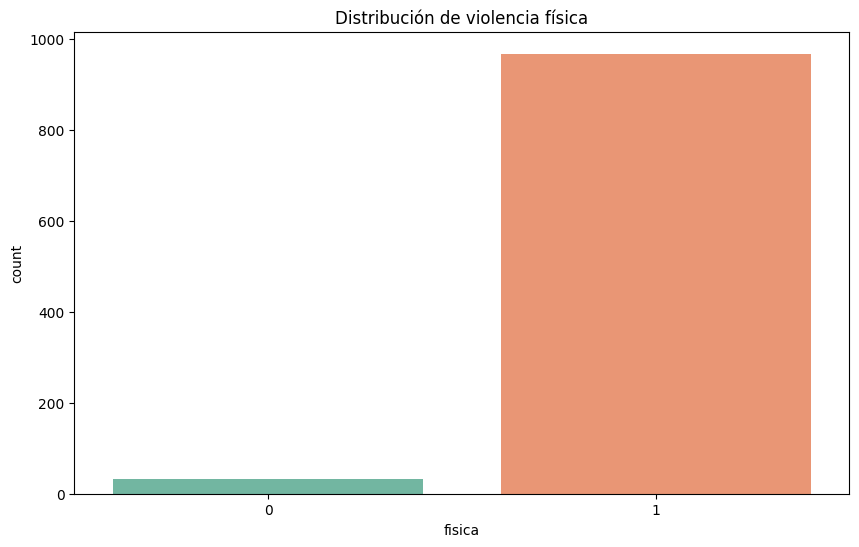

C:\Users\manop\AppData\Local\Temp\ipykernel_18264\1091878962.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='verbal', palette='Set2')
C:\Users\manop\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\manop\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of 

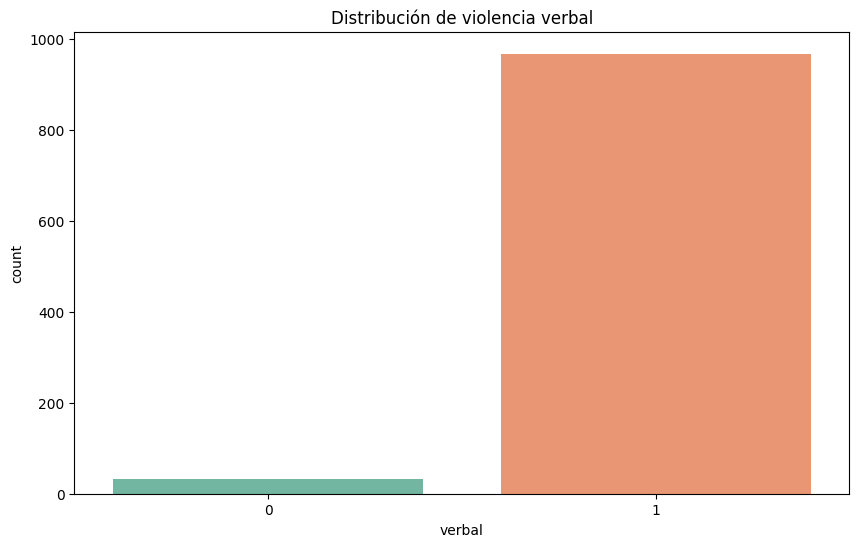

C:\Users\manop\AppData\Local\Temp\ipykernel_18264\1091878962.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='economica', palette='Set2')
C:\Users\manop\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\manop\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version

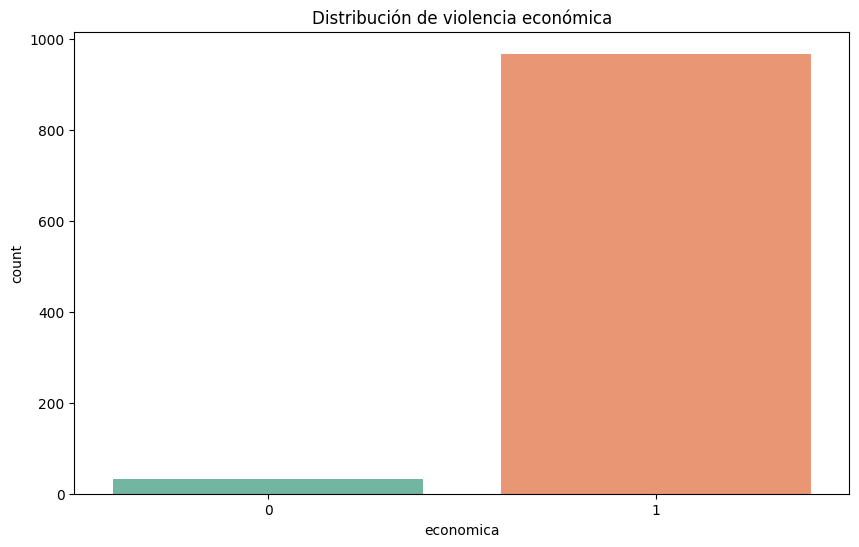

C:\Users\manop\AppData\Local\Temp\ipykernel_18264\1091878962.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='psicologica', palette='Set2')
C:\Users\manop\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\manop\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future versi

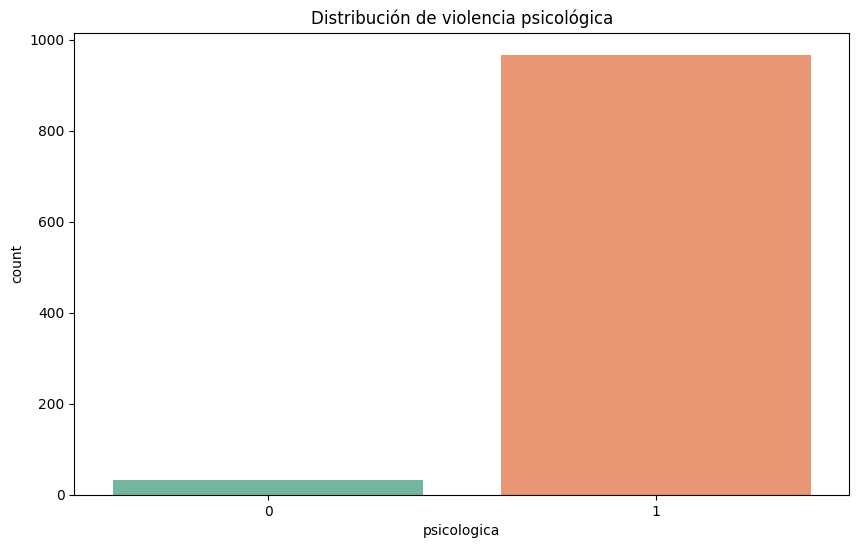

C:\Users\manop\AppData\Local\Temp\ipykernel_18264\1091878962.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sexual', palette='Set2')
C:\Users\manop\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\manop\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of

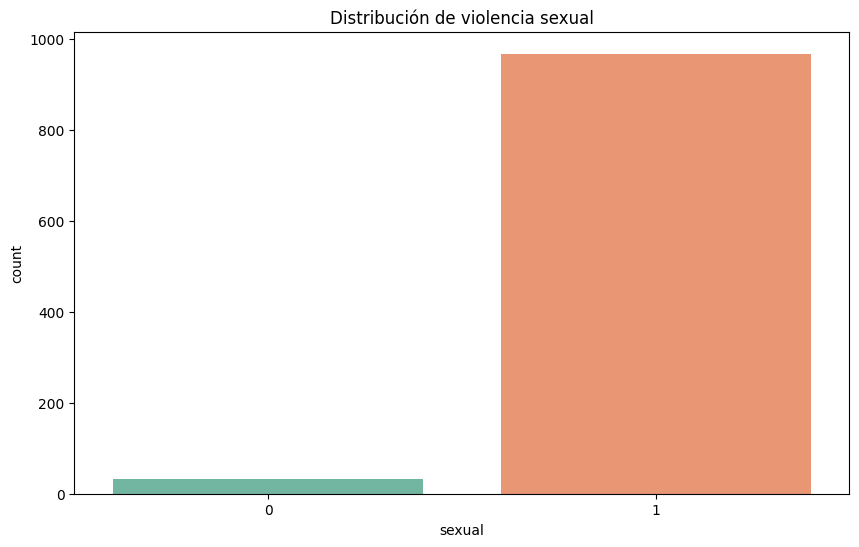

In [70]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='fisica', palette='Set2')
plt.title('Distribución de violencia física')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='verbal', palette='Set2')
plt.title('Distribución de violencia verbal')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='economica', palette='Set2')
plt.title('Distribución de violencia económica')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='psicologica', palette='Set2')
plt.title('Distribución de violencia psicológica')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='sexual', palette='Set2')
plt.title('Distribución de violencia sexual')
plt.show()


C:\Users\manop\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\manop\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\manop\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_base.py:949: FutureWarning: When grouping 

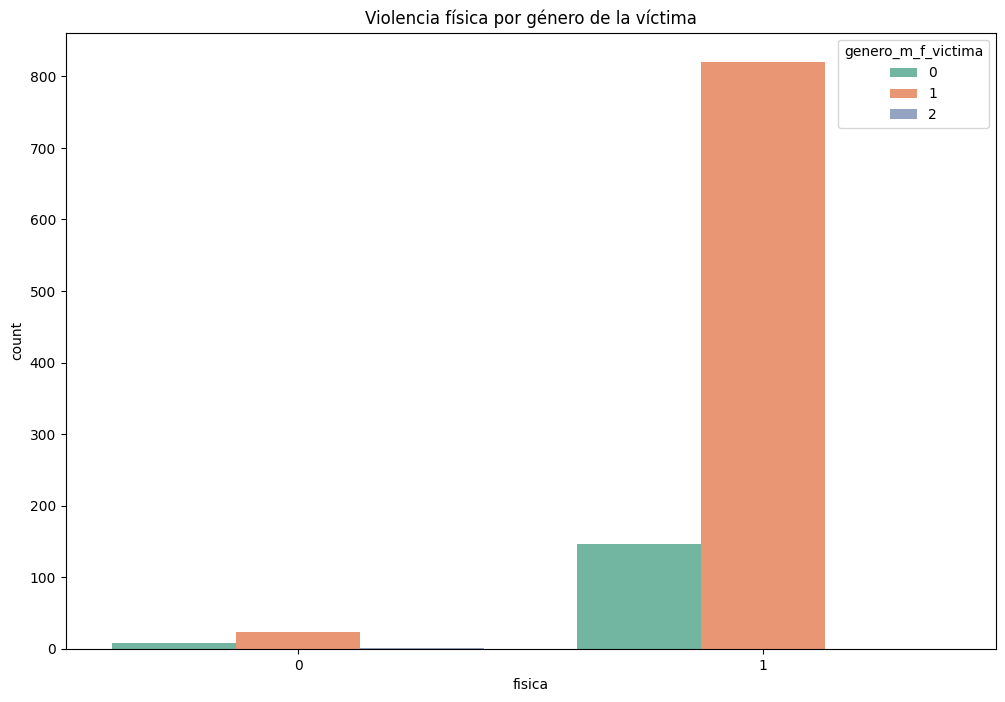

C:\Users\manop\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\manop\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\manop\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_base.py:949: FutureWarning: When grouping 

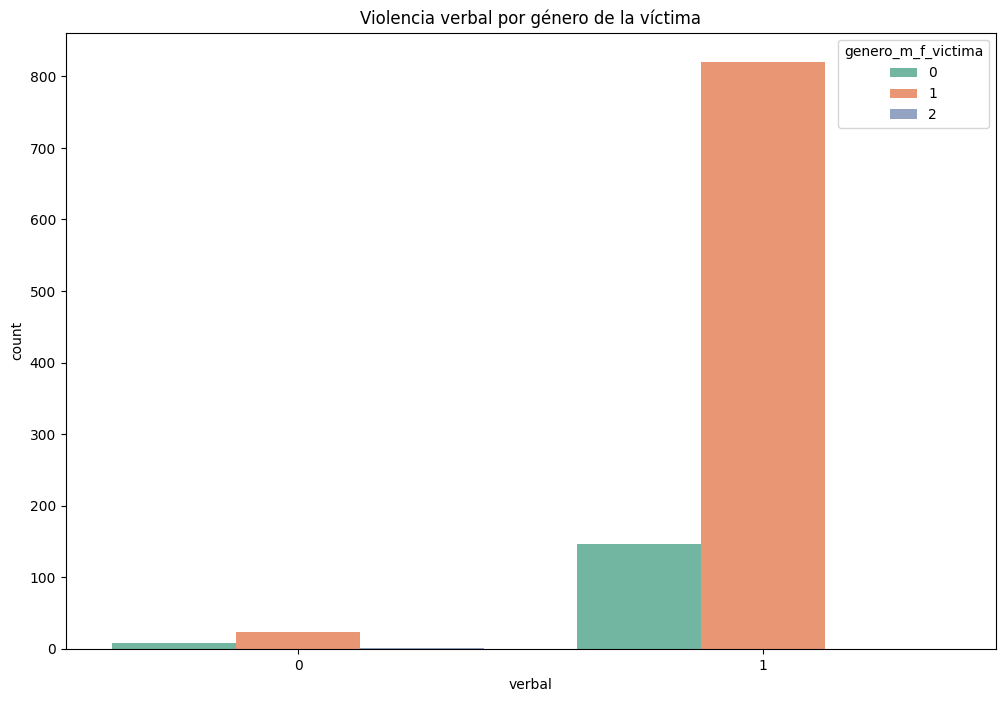

C:\Users\manop\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\manop\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\manop\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_base.py:949: FutureWarning: When grouping 

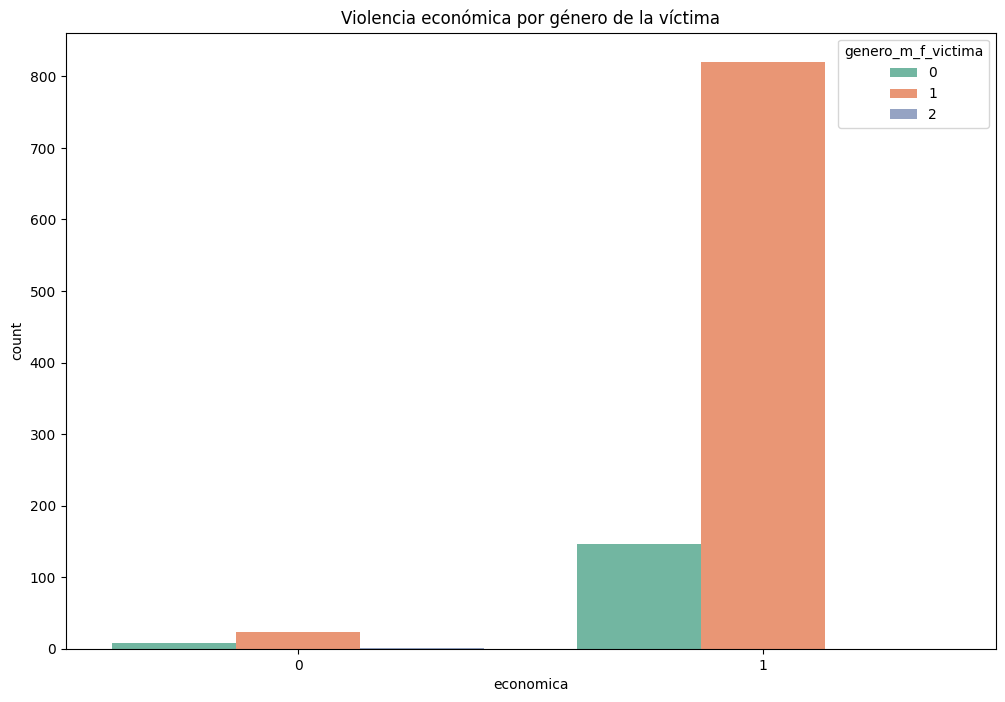

C:\Users\manop\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\manop\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\manop\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_base.py:949: FutureWarning: When grouping 

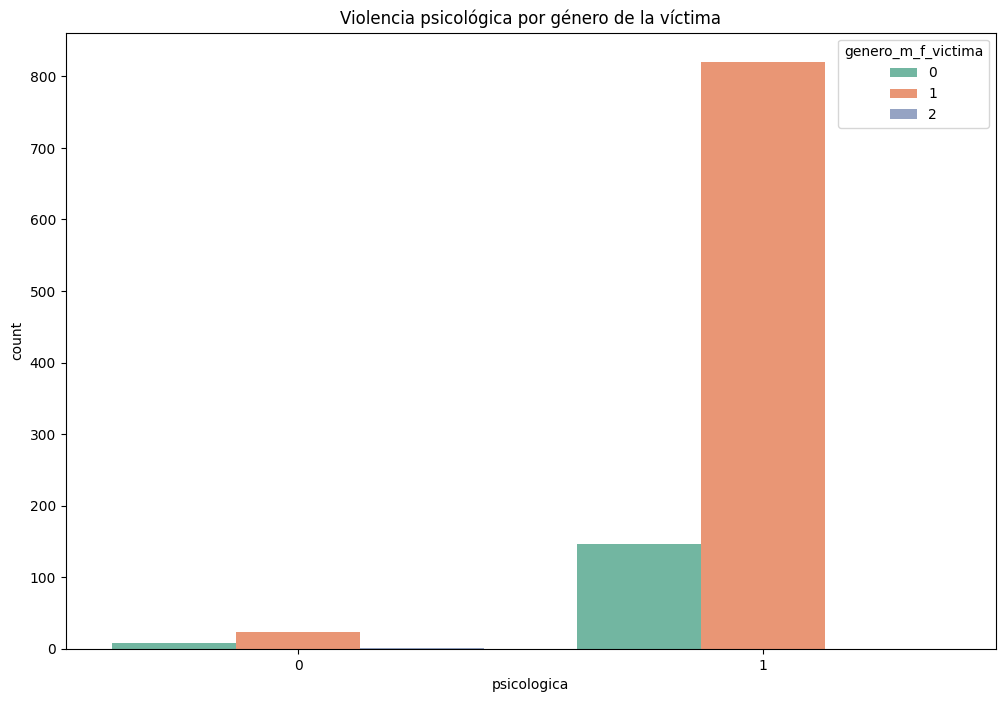

C:\Users\manop\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\manop\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\manop\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_base.py:949: FutureWarning: When grouping 

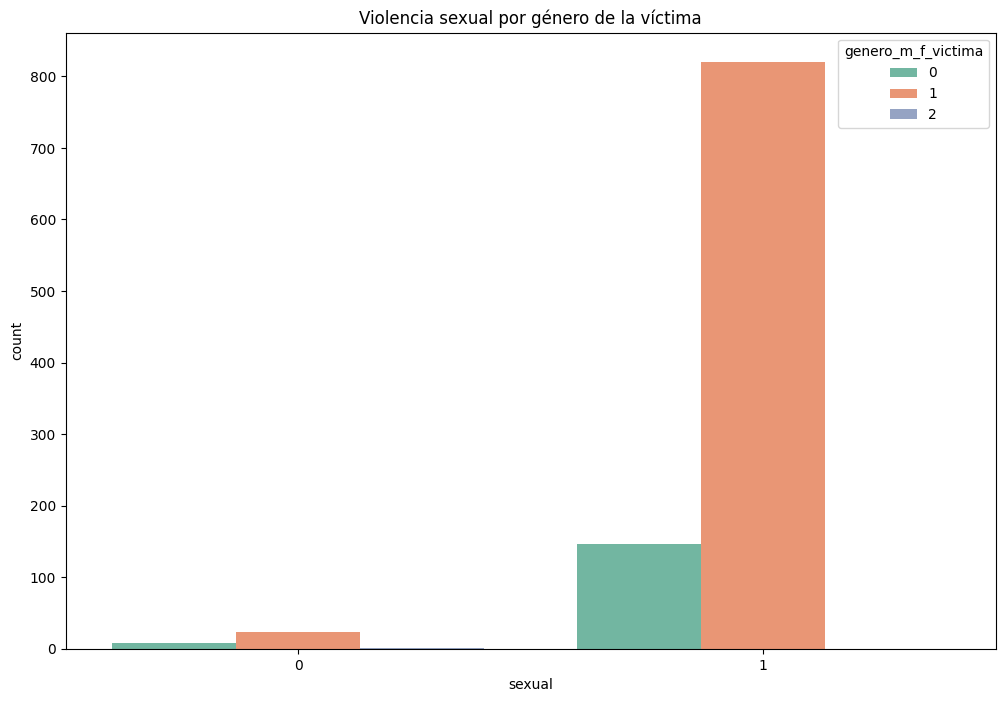

In [71]:
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='fisica', hue='genero_m_f_victima', palette='Set2')
plt.title('Violencia física por género de la víctima')
plt.show()

plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='verbal', hue='genero_m_f_victima', palette='Set2')
plt.title('Violencia verbal por género de la víctima')
plt.show()

plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='economica', hue='genero_m_f_victima', palette='Set2')
plt.title('Violencia económica por género de la víctima')
plt.show()

plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='psicologica', hue='genero_m_f_victima', palette='Set2')
plt.title('Violencia psicológica por género de la víctima')
plt.show()

plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='sexual', hue='genero_m_f_victima', palette='Set2')
plt.title('Violencia sexual por género de la víctima')
plt.show()


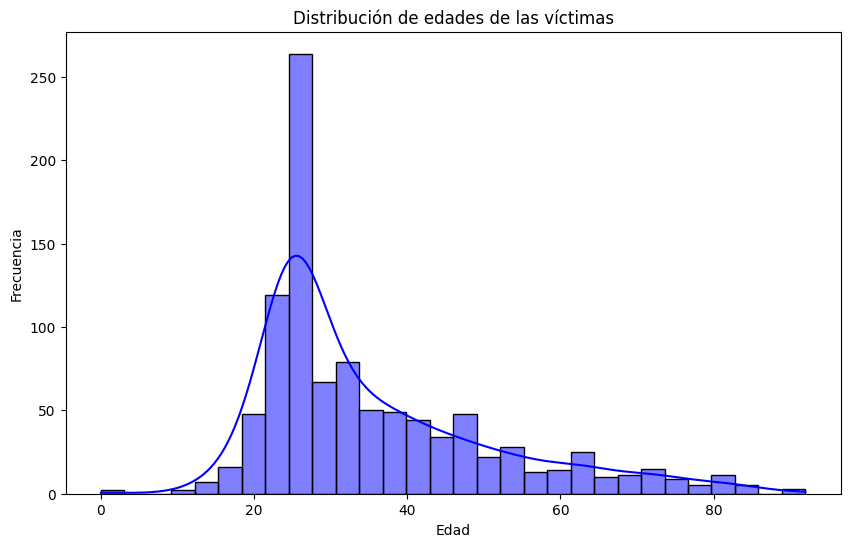

In [72]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='edad_victima', bins=30, kde=True, color='blue')
plt.title('Distribución de edades de las víctimas')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()


C:\Users\manop\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\manop\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


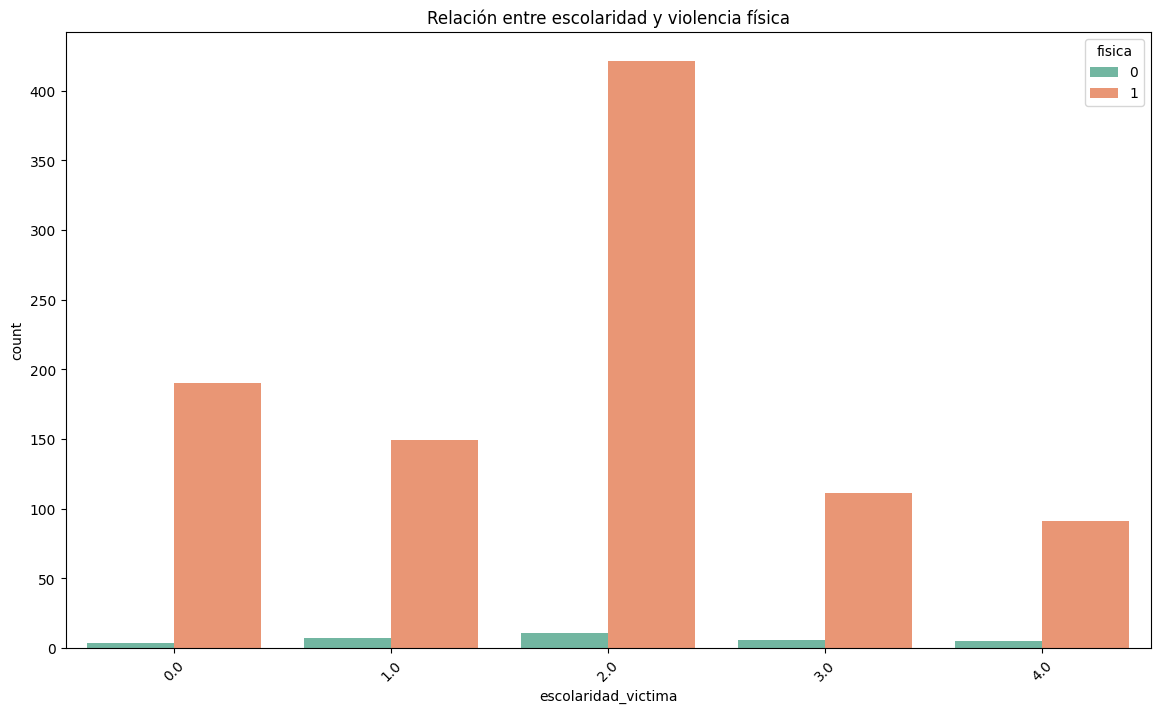

C:\Users\manop\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\manop\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


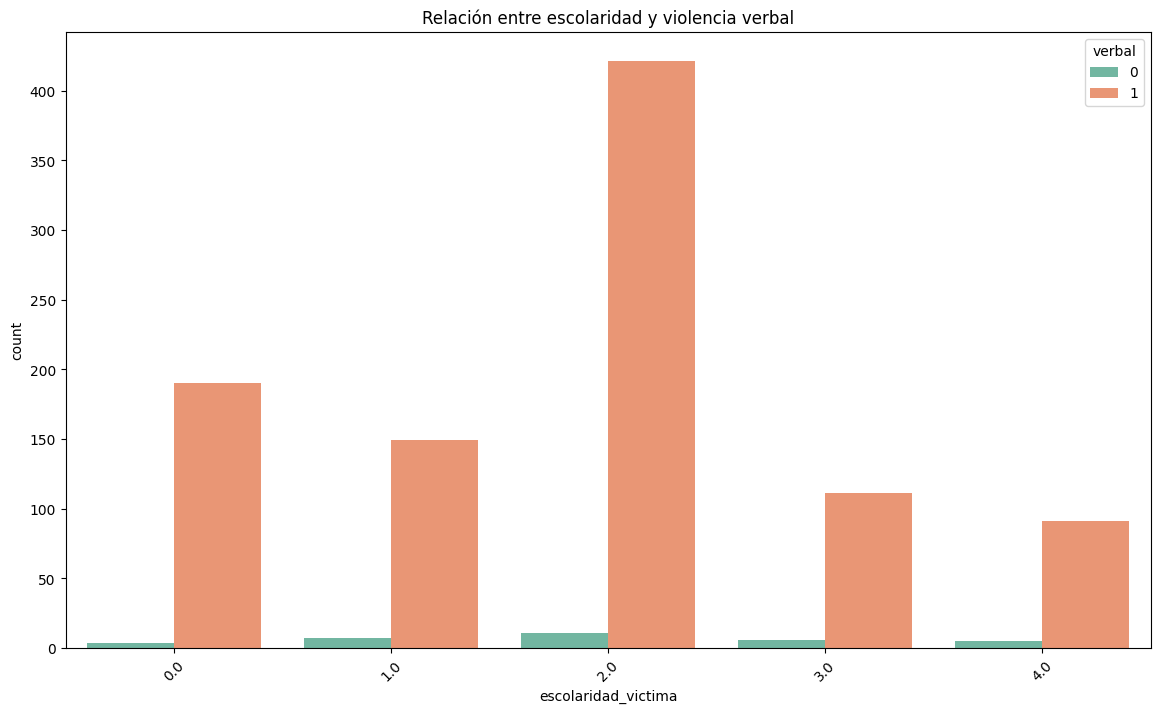

C:\Users\manop\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\manop\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


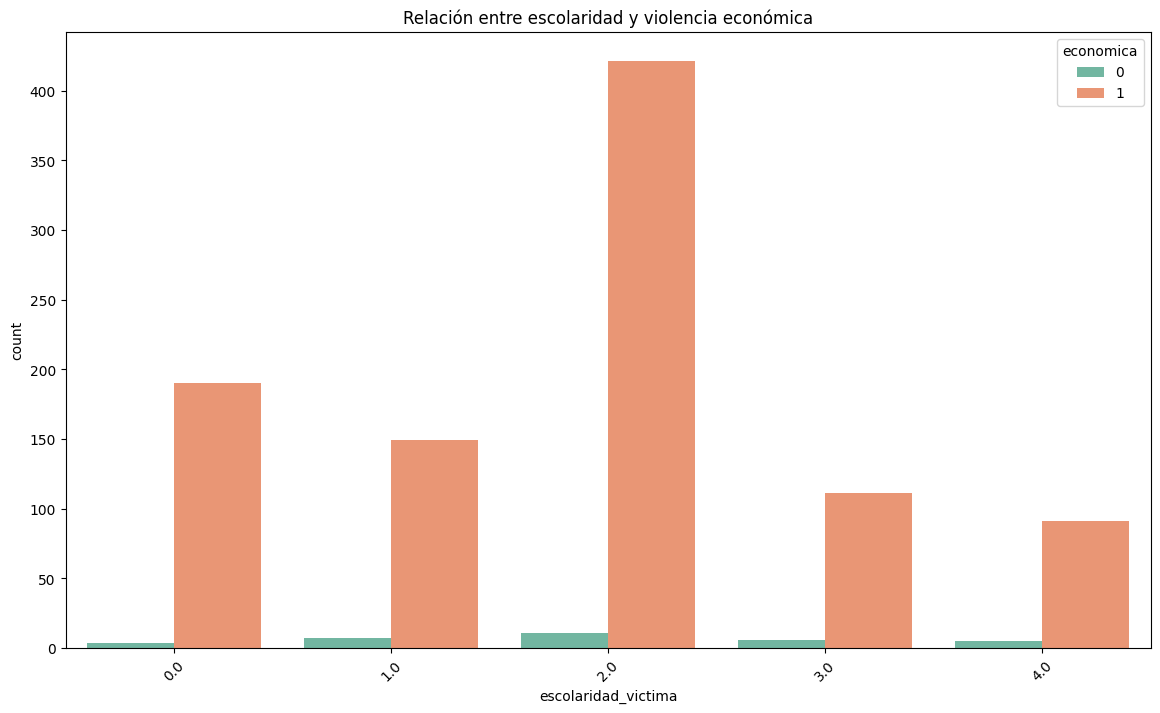

C:\Users\manop\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\manop\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


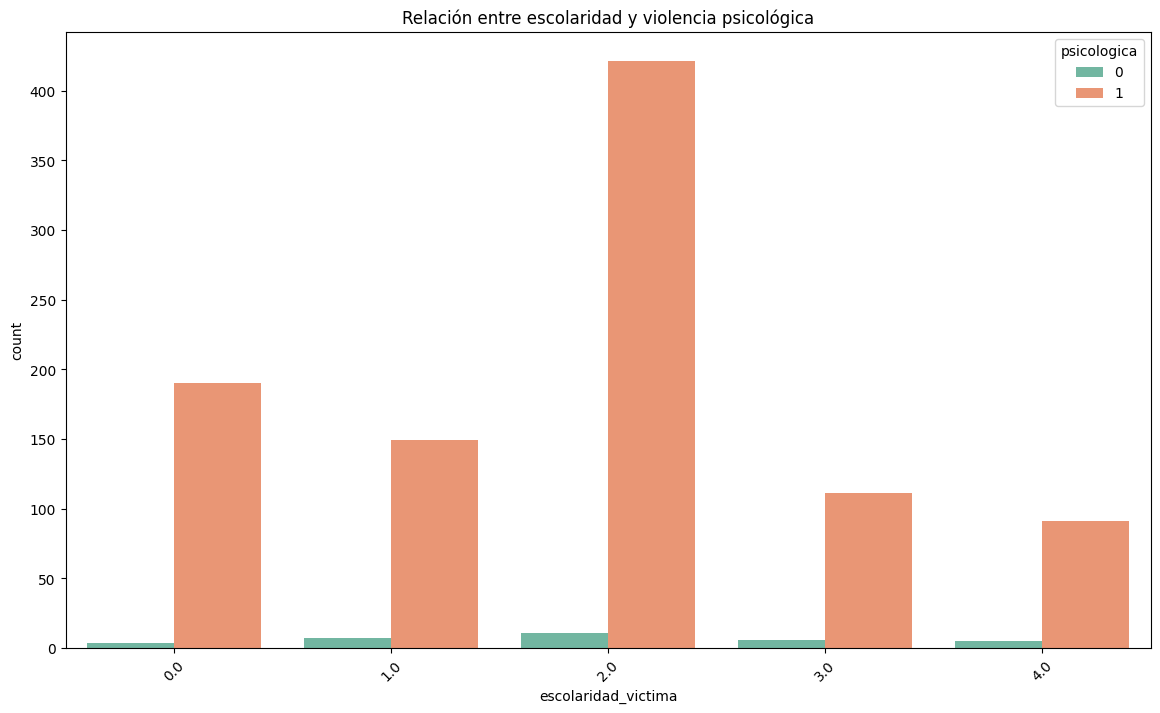

C:\Users\manop\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\manop\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


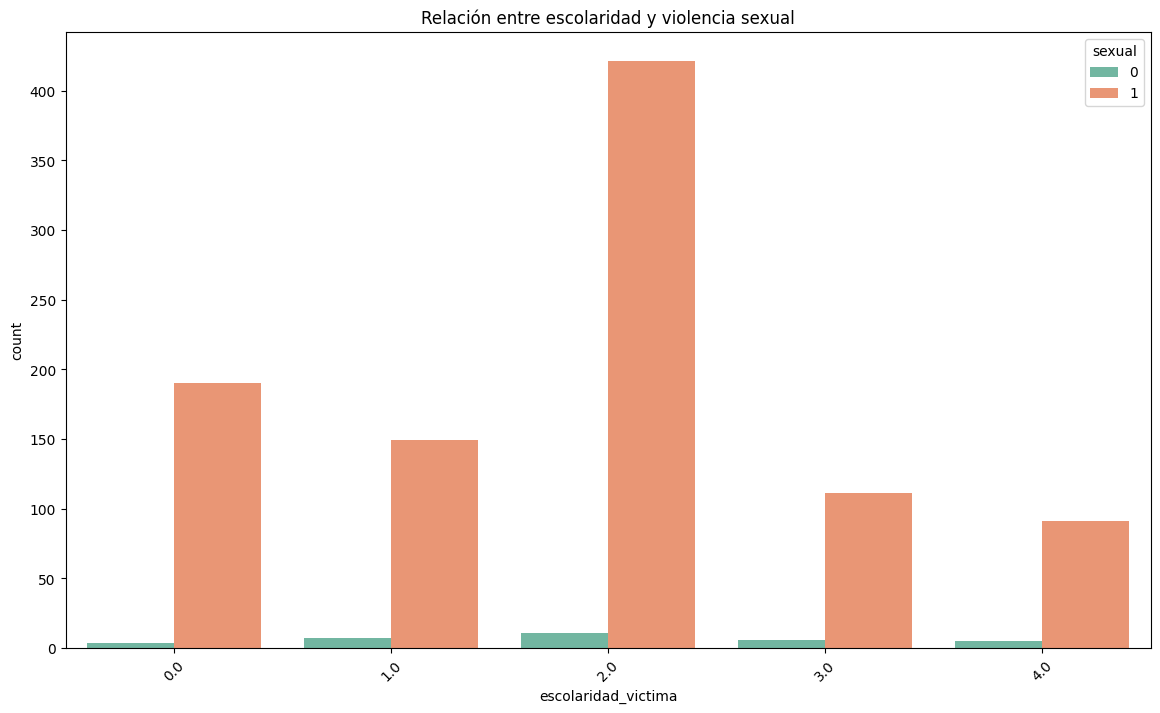

In [73]:
plt.figure(figsize=(14, 8))
sns.countplot(data=df, x='escolaridad_victima', hue='fisica', palette='Set2')
plt.title('Relación entre escolaridad y violencia física')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(14, 8))
sns.countplot(data=df, x='escolaridad_victima', hue='verbal', palette='Set2')
plt.title('Relación entre escolaridad y violencia verbal')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(14, 8))
sns.countplot(data=df, x='escolaridad_victima', hue='economica', palette='Set2')
plt.title('Relación entre escolaridad y violencia económica')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(14, 8))
sns.countplot(data=df, x='escolaridad_victima', hue='psicologica', palette='Set2')
plt.title('Relación entre escolaridad y violencia psicológica')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(14, 8))
sns.countplot(data=df, x='escolaridad_victima', hue='sexual', palette='Set2')
plt.title('Relación entre escolaridad y violencia sexual')
plt.xticks(rotation=45)
plt.show()


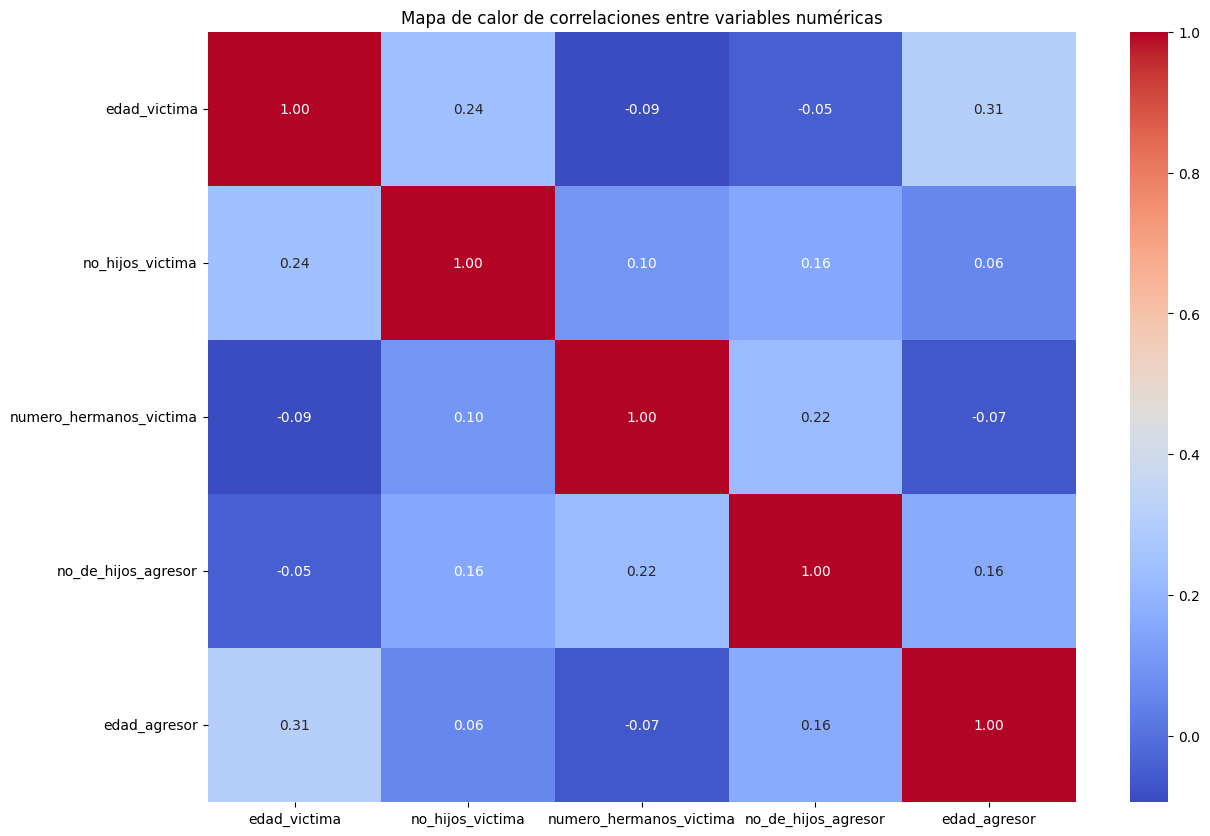

In [74]:
plt.figure(figsize=(14, 10))
sns.heatmap(df[numeric_columns].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Mapa de calor de correlaciones entre variables numéricas')
plt.show()
